In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

**Collecting data**


In [2]:
data=pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
print("No. of passengers in titanic",str(len(data.index)))

No. of passengers in titanic 891


**Analysing data**

In [13]:
import seaborn as sns

<Axes: xlabel='Survived', ylabel='count'>

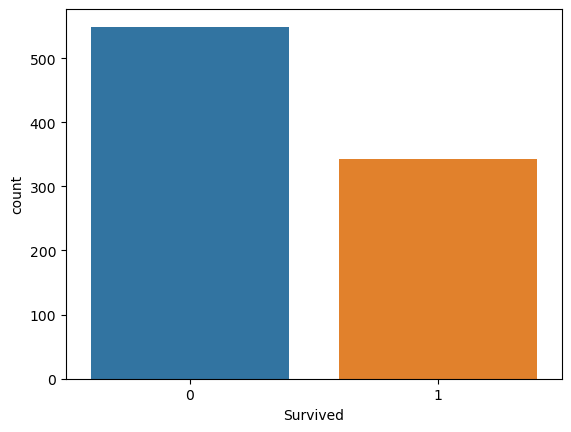

In [14]:
sns.countplot(x="Survived",data=data)

<Axes: xlabel='Survived', ylabel='count'>

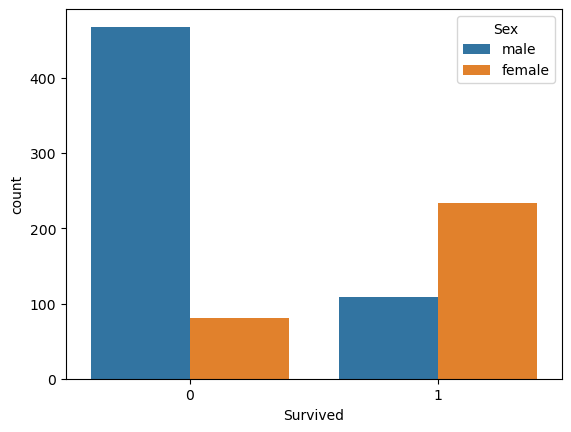

In [19]:
sns.countplot(x="Survived",hue="Sex",data=data)

AttributeError: 'numpy.int64' object has no attribute 'startswith'

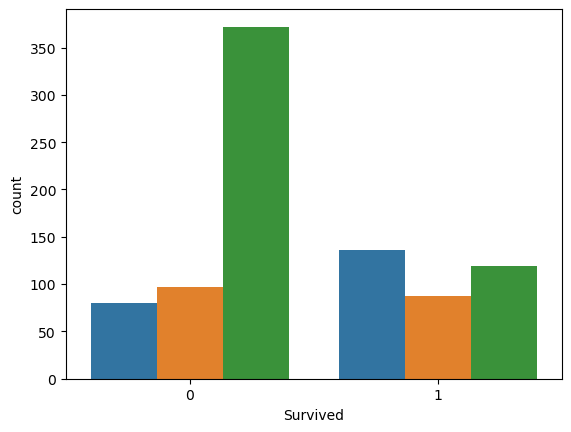

In [29]:
sns.countplot(x="Survived",hue="Pclass",data=data)

<Axes: >

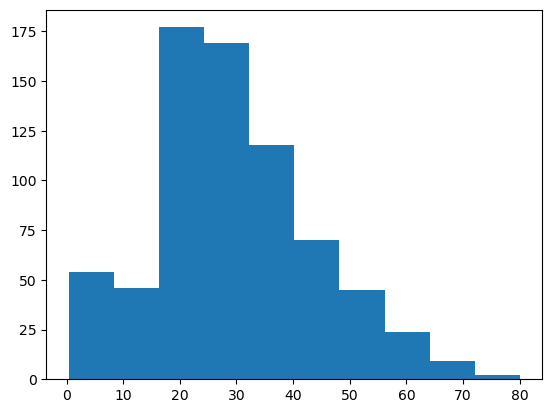

In [31]:
data['Age'].hist(grid=False)

<Axes: ylabel='Fare Price'>

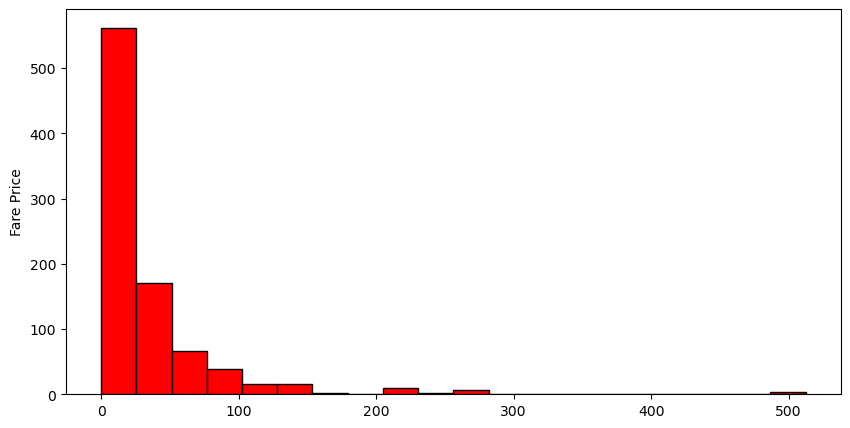

In [49]:
data['Fare'].plot.hist(bins=20,edgecolor="black",color="red",figsize=(10,5),ylabel="Fare Price")

<Axes: xlabel='SibSp', ylabel='count'>

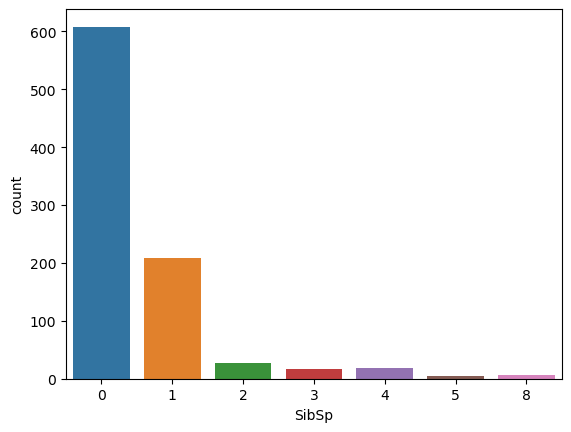

In [50]:
sns.countplot(x="SibSp",data=data)

**Data Wrangling**

<Axes: >

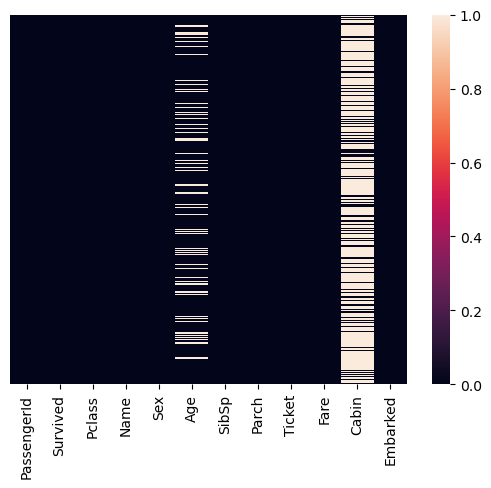

In [59]:
sns.plotheatmap(data.isnull(),yticklabels=False)

In [62]:
data.drop('Cabin',axis=1,inplace=True)

In [63]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [68]:
data.dropna(inplace=True)

<Axes: >

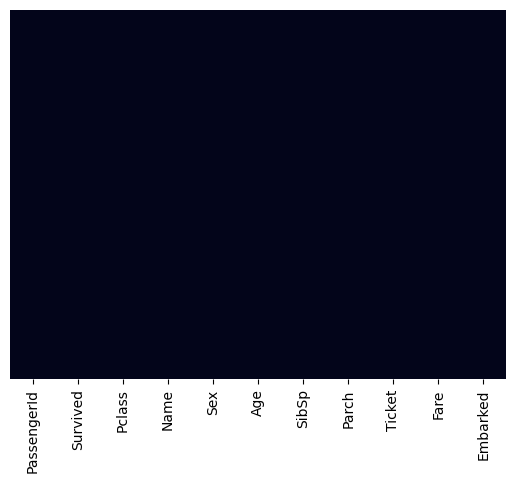

In [72]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [73]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [84]:
data.loc[data.Age==0,'Age']=30

In [90]:
data.Age.isin([30]).sum()

25

In [95]:
data.Embarked.isin([0]).sum()

0

In [121]:
sex=pd.get_dummies(data['Sex'],drop_first=True,dtype='int')
sex.head(5)

,male
0,1
1,0
2,0
3,0
4,1


In [102]:

embark=pd.get_dummies(data['Embarked'],dtype='int',drop_first=True)

embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [103]:
Passenger_class=pd.get_dummies(data['Pclass'],dtype='int',drop_first=True)
Passenger_class.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [108]:
data.drop('male',axis=1,inplace=True)

In [109]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S,2,3,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,0,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0,1,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,0,1,0,1,0,1


In [112]:
data.drop('Q',axis=1,inplace=True)

In [113]:
data.drop('S',axis=1,inplace=True)

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
 11  2            712 non-null    int32  
 12  3            712 non-null    int32  
 13  2            712 non-null    int32  
 14  3            712 non-null    int32  
dtypes: float64(2), int32(4), int64(5), object(4)
memory usage: 77.9+ KB


In [119]:
data.drop(data.columns[11:13],axis=1,inplace=True)

In [120]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [122]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [126]:
new_data=pd.concat([data,sex,embark,Passenger_class],axis=1)

In [127]:
new_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,0,1,0,0,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0,0,0


In [128]:
new_data.drop(['PassengerId','Pclass','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [129]:
new_data

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,0,1,0,0,1
886,0,27.0,0,0,13.0000,1,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,0


In [130]:
data=new_data

In [131]:
data

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,0,1,0,0,1
886,0,27.0,0,0,13.0000,1,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,0


**Train The data**


In [174]:
X=data.drop('Survived',axis=1)
y=data['Survived']

In [175]:
from sklearn.model_selection import train_test_split
#We should note that in newer version of scikit learn cross_validation is depreciated and model_selection is used

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [177]:
from sklearn.linear_model import LogisticRegression

In [178]:
logmodel=LogisticRegression()

In [186]:
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

**Correction**

In [167]:
data.rename(columns={'2':'Two'},inplace=True)
#NOt able to directly access 2 and 3

In [168]:
data.rename(columns={'3':'Three'},inplace=True)

In [171]:
data.rename(columns={data.columns[8]:"Two"},inplace=True)

In [172]:
data.rename(columns={data.columns[9]:"Three"},inplace=True)

In [173]:
data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,Two,Three
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


**Correction**

In [184]:
logmodel=LogisticRegression(max_iter=1000)

In [187]:
predictions=logmodel.predict(X_test)

In [188]:
from sklearn.metrics import classification_report

In [190]:
classification_report(y_test,predictions).split()

['precision',
 'recall',
 'f1-score',
 'support',
 '0',
 '0.80',
 '0.81',
 '0.81',
 '126',
 '1',
 '0.72',
 '0.72',
 '0.72',
 '88',
 'accuracy',
 '0.77',
 '214',
 'macro',
 'avg',
 '0.76',
 '0.76',
 '0.76',
 '214',
 'weighted',
 'avg',
 '0.77',
 '0.77',
 '0.77',
 '214']

In [191]:
from sklearn.metrics import confusion_matrix

In [192]:
confusion_matrix(y_test,predictions)

array([[102,  24],
       [ 25,  63]], dtype=int64)

In [193]:
from sklearn.metrics import accuracy_score

In [195]:
accuracy_score(y_test,predictions)
Acc_per=accuracy_score(y_test,predictions)*100
print("Accuracy is ",Acc_per)

Accuracy is  77.10280373831776
